importation

In [1]:
!pip install numdifftools

from sys import exit
import matplotlib.pyplot as plt
import numdifftools as nd
import numpy as np
from numpy import linalg as LA
from mpl_toolkits import mplot3d
from sympy import diff, symbols
import time
%matplotlib notebook


fonction vecteur Gradient

In [2]:
def vecteurGradient(f,x):
    i=0
    vecteurgradient=[]
    while i<len(x):
        vecteurgradient.append(diff(f, x[i]))
        i+=1    
    return vecteurgradient

fonction matrice Hessienne

In [3]:
def matriceHessienne(grad,x):
    i=0
    matriceHessienne=[]
    while i<len(x):
        j=0
        col=[]
        while j<len(x):
            col.append(diff(grad[i], x[j]))
            j+=1
        matriceHessienne.append(col)
        i+=1 
    return matriceHessienne

fonction gradient Conjugue

In [4]:
def gradientConjugue (A , b , tol,x0,k) :
    d = len ( b )
    xn,pn , rn , L = np.zeros ( d ) , b , b , [] # Initialisation
    xn=x0

    for n in range (d+2) :
        if LA.norm (rn) < tol : # Condition de sortie " usuelle "
            iteration_tab[k]=n
            enregistrer("1/2*np.dot(np.matmul(A,x),x)-np.dot(b,x)",xn,x0)
            return xn , L
        L . append (xn)
        Apn = np.dot (A , pn) #une seule multiplication matrice / vecteur
        alphan = np.dot (rn , rn) / np.dot (pn , Apn)
        xn , rnp1 = xn + alphan * pn , rn - alphan * Apn
        pn , rn = rnp1 + np.dot (rnp1 , rnp1) / np.dot (rn , rn) * pn , rnp1
    print (" Probleme , l’algorithme n’a pas convergé après ",n ," itérations ")

fonction matrice definie positive

In [5]:
def is_pos_def(A):
    x=-1
    if np.all(np.linalg.eigvals(A) > 0) :
        x=1
    return x

fonction matrice Symétrique

In [6]:
def sym(A,nbl,nbc):
        sym=True
        for i in range(nbl) :
            for j in range(nbc) : 
                if A[i][j]!= A[j][i] : 
                    
                    sym=False
        return sym

donner valeur fonction

In [7]:
def copierF(f,Vx):
    X = np.array([x,y])

    i = 0
    f1 = f.copy()
    while i < 2:
        f1 = f1.subs({X[i]:Vx[i]})
        i += 1
    return f1

evalue gradien dans un point

In [8]:
def evaluateGrad(gradient,Vx):
    X = np.array([x,y])

    i = 0
    #copy objet
    valeurs = gradient.copy()
    while i < 2:
        j = 0
        while j < 2:
            valeurs[i] = valeurs[i].subs({X[j]:Vx[j]})
            j += 1
        i += 1
    return np.array(valeurs,dtype=np.float64)

gradient conjuge pour fonction format non matricielle  

In [9]:
def gradientConjuguef(f, grad,alpha_0,x0, ep):
    i = 0
    xi = x0
    valeurf = copierF(f,xi)
    valgradient=evaluateGrad(grad,xi)
    grad_x0 = valgradient
    grad_x = valgradient
    direction = - grad_x
    while np.linalg.norm(grad_x) > ep :
       
        i = i + 1
        print("iteration :", i)
        
        alpha = 0.015
        print("step=",alpha)
        
        # Calcul point successeur
        xi = xi + alpha * direction
        print("iteration: ", xi)
        # Calcul gradient point successeur
        grad_x = evaluateGrad(grad,xi)
        valeurf = copierF(f,xi)
        beta = ((np.linalg.norm(grad_x)**2)/(np.linalg.norm(grad_x0)**2))
        # Calcul la nouvelle direction
        direction = beta * direction - grad_x
        print("direction:",direction)
        grad_x0 = grad_x
       
        print("valeur ", valeurf)
        
    enregistrer(f,xi,x0)
    return xi,valeurf

fonction comparative 3 X0

In [10]:
def compareexp5v(e3x0,A,b):
    time_tab = [0.0 ,0.0 ,0.0 ]
    tab = e3x0
    
    for k in range(3) : 
        x0=e3x0[k] 
        start_time = time.time()
        print(time.time())
        m,p=gradientConjugue(A,b,1e-6,x0,k)
        print(time.time())
   
        time_tab[k]=time.time()- start_time
    print("               ************ Comparative *************                ")
    print ("------------------------------------------------------------------------------------")
    print ("|       XO            |  " ,tab[0],"     | ",tab[1],"     | ",tab[2],"                              ")
    print ("------------------------------------------------------------------------------------")

    print ("| Temps d'éxecution   |  " ,round(time_tab[0],12)," | ",round(time_tab[1],12)," | ",round(time_tab[2],12), "    ")
    print ("------------------------------------------------------------------------------------")

    print ("| Nombre d'itération  |  " ,iteration_tab[0],"              | ",iteration_tab[1],"              | ",iteration_tab[2],"   ")
    print ("------------------------------------------------------------------------------------")
    print(m)

fonction saisir 3 x0

In [11]:
def saisiex0() :
    
    while (True):
        try:
            x0_1=float(input("Donner x0 :"))
            if (isinstance(x0_1, float)):
                break
        except:
            print("voulez vous taper données correctes!")
    while (True):
        try:
            x0_2=float(input("Donner y0 :"))
            if (isinstance(x0_2, float)):
                break
        except:
            print("voulez vous taper données correctes!")
    x0=[x0_1,x0_2] 

    while (True):
        try:
            x1_1=float(input("Donner x1 :"))
            if (isinstance(x1_1, float)):
                break
        except:
            print("voulez vous taper données correctes!")
    
    while (True):
        try:
            x1_2=float(input("Donner y1 :"))
            if (isinstance(x1_2, float)):
                break
        except:
            print("voulez vous taper données correctes!")
    x1=[x1_1,x1_2]

    while (True):
            try:
                x2_1=float(input("Donner x2 :"))
                if (isinstance(x2_1, float)):
                    break
            except:
                print("voulez vous taper données correctes!")

    while (True):
            try:
                x2_2=float(input("Donner y2 :"))
                if (isinstance(x2_2, float)):
                    break
            except:
                print("voulez vous taper données correctes!")
    x2=[x2_1,x2_2]
    tab=[x0,x1,x2]
    return tab 

fonction tracer courbe final (avec iterations)

In [12]:
def tracerCourbefinal(f,tab,sol):
    print(tab)
    x, y = np.meshgrid(rang_x, rang_y)
    fc=eval(f)
    surf = ax.plot_surface(x, y, fc, cmap = plt.cm.cividis,alpha=0.8)
    # Set axes label
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('f(x,y)', labelpad=20)

    for k in range(len(tab)) :
        txt=f.replace('x',str(tab[k][0]))
        txt=txt.replace('y',str(tab[k][1]))
        z=eval(txt)
        ax.scatter(tab[k][0],tab[k][1],z,s=5,c='blue')


    txt=f.replace('x',str(sol[0]))
    txt=txt.replace('y',str(sol[1]))
    z=eval(txt)
    ax.scatter(sol[0],sol[1],z,s=12,c='red') 

fonction tracer courbe

In [13]:
def tracerCourbe(f):
    
    x, y = np.meshgrid(rang_x, rang_y)
    f=eval(f)
    surf = ax.plot_surface(x, y, f, cmap = plt.cm.cividis,alpha=0.8)
    # Set axes label
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('f(x,y)', labelpad=20)

fonction tracer Lignes Niveaux

In [14]:
def tracersLignesNiveaux (f):
    x, y = np.meshgrid(rang_x, rang_y)
    global lignenv
    f=eval(f)
    lignenv= ax.contour(x, y, f,16,colors='black')

fonction print Menu Niveau2

In [15]:
def printMenuNiveau2():
    print("a. Tracer la courbe\nb. Tracer les lignes de niveaux et les ajouter au graphe existant\nc. Calculer le vecteur gradient\nd. Calculer la matrice Hessiennee\ne.Appliquer la méthode de gradient conjugué standard.\nf. Visualiser un comparatif avec 3 différents X0 \ng. Revenir au niveau 1\nh.revenir à l'interface\n") 

enregistrer memoire

In [16]:
def enregistrer(f,res,x0):
    try:
        file = open('resultat.txt', 'a')
        file.write(f"* La fonction est : {f}\n")
        file.write(f"* La solution (xmin) = {res[0]}\n")
        file.write(f"* Valeur minimal de f (fmin) = {res[1]}\n")
        file.write(f"* Vecteur de depart (x0) = {x0}\n")
        file.write(f"---------------------------------------------------\n")
        file.close()
        print("Le résultat est enregistré avec succès dans 'Resultats.txt'")
    except Exception as e:
        print("Le résultat n'a pas été enregistré")

In [17]:
#fonction pour appeler menu1(projets1,2&4)
def myfunction(ch):
    global choix
    if(ch=='choisir'):
        choix=1
    elif (ch=='saisir'):
        choix=2
    else: 
        choix=3

In [18]:
#fonction pour récupérer la fonction choisie par l'utilisateur de la mémoire
def myfunction2(ch): 
    global choix2
    if(ch=='(1 − 𝑥)² + 100(𝑦 − 𝑥²)²'):
        choix2=1
    elif (ch=='xexp(-x²-y²)'):
        choix2 =2
    else: 
        choix2=3 

In [19]:
#fonction pour récupérer la fonction saisie par l'utilisateur
def functionsaisie(ch): 
    global f
    f=ch  

fonction Menu

In [20]:
def menu():
####################cette partie est exécutée dans l'interface####################
#     print("1. Choisir une fonction de la mémoire\n2. Saisir sa propre fonction\n3. Quitter\n")
#     while (True):
#         try:
#             choix = eval(input("choix="))
#             if (str(choix).isnumeric() and choix>0 and choix<4):
#                 break
#         except:
#             print("voulez vous taper données correctes!")
     
    if(choix==1):
####################cette partie est exécutée dans l'interface####################
#         print("-----------------\n1.𝑓(𝑥, 𝑦) =(1 − 𝑥) ² + 100(𝑦 − 𝑥 ²)²\n2.𝑓(𝑥, 𝑦,Z,Z2,Z3) =1/2〈𝐴𝑥, 𝑥〉 − 〈𝑏, 𝑥〉 :ℜ5\n3.𝑓(𝑥, 𝑦) =1/2〈𝐴𝑥, 𝑥〉 − 〈𝑏, 𝑥〉 :ℜ2\n-----------------\n")
        
        
#         while (True):
#             try:
# #                 choix2 = eval(input("Donner votre choix="))
#                 if (str(choix2).isnumeric() and choix2>0 and choix2<4):
#                     break
#             except:
#                 print("voulez vous taper données correctes!")
      
        if(choix2==1):
            func=eval(func1)
            printMenuNiveau2()
            while (True):
                choix3 = input("choix=")
                if( choix3=='a' or  choix3=='b'or choix3=='c' or choix3=='d' or choix3=='e' or choix3=='f' or choix3=='g' or choix3=='h'):
                    break
           
            if (choix3=='a'):
                tracerCourbe(func1)
                plt.show()
                menu()
            elif (choix3=='b'):
                tracerCourbe(func1)
                tracersLignesNiveaux(func1)
                plt.show()
                menu()
            elif (choix3=='c'):
                X, Y, = symbols('x y', real=True)
                func=pow((1-X), 2)+100*pow((Y-pow(X,2)),2)        
                print("le vecteur gradient:")
                print(vecteurGradient(func,[x,y]))
                menu()
                #printMenuNiveau2()
            elif (choix3=='d'):
                X, Y, = symbols('x y', real=True)
                func=pow((1-X), 2)+100*pow((Y-pow(X,2)),2)    
                print("la matrice Hessienne:")
                print(matriceHessienne(vecteurGradient(func,[x,y]),[x,y]))
                menu()

            elif (choix3=='e'):
                print("Erreur: Cette commande ne fonctionne pas ! ") #projet final: on a modifié l'affichage par ce message

#                 ep=10**-4                         #ne fonctionne pas
#                 X, Y, = symbols('x y', real=True)
#                 gradient = vecteurGradient(eval(func1),[x,y])
#                 res = gradientConjuguef(eval(func1), gradient, 1.0, np.array([1,1]), ep)
#                 print("points min :",res[0])
#                 print("valeur:",res[1])
                menu()
            elif (choix3=='f'): 
                print("Erreur: Cette commande ne fonctionne pas ! ") #projet final: on a modifié l'affichage par ce message
                #print("impossible fonction non linéaire")
                menu()
            elif (choix3=='g'):
                menu()
            elif (choix3=='h'):
                
                    print('Retour à linterface')
                    sys.exit('bye') #pour migrer du console vers l'interface

        elif(choix2==2):
            print("Erreur: ce projet ne fonctionne pas avec les fonctions non linéaires")#projet final: on a modifié l'affichage par ce message
            sys.exit('sssssss') #pour migrer du console vers l'interface

            #break
            
            #menu()
            
        elif(choix2==3):
            func=eval(func3)
            printMenuNiveau2()
            while (True):
                choix3 = input("choix=")
                if( choix3=='a' or  choix3=='b'or choix3=='c' or choix3=='d' or choix3=='e' or choix3=='f' or choix3=='g' or choix3=='h' ):
                    break
            if (choix3=='a'):
                print("On a 5 varaibles on ne peut pas tracer courbe")
            elif (choix3=='b'):
                print("On a 5 varaibles on ne peut pas tracer courbe")
            elif (choix3=='c'):
                func=eval(func3)        
                print("le vecteur gradient:")
                print(vecteurGradient(func,x5))
            elif (choix3=='d'):   
                print("la matrice Hessienne:")
                print(matriceHessienne(vecteurGradient(func,x5),x5))

            elif (choix3=='e'):
                while (True):
                    try:
                        tol=float(input(" Donner epsilon "))
                        if (isinstance(tol, float)):
                            break
                    except:
                        print("voulez vous taper données correctes!")
                
                k=0
                X0=[]
                while k<5:
                    while (True):
                        try:
                            elemx0=float(input("Donner x0:"))
                            if (isinstance(elemx0, float)):
                                break
                        except:
                            print("voulez vous taper données correctes!")
                    X0.append(elemx0)
                    k+=1

                if((is_pos_def(A)== -1)) :
                    print("La matrice n'est pas définie postive ")
                    exit()
                        
                        
                if((sym(A,5,5)==False)) :
                        repete=True
                        print("La matrice n'est pas symétrique ")
                        exit()
                
                
                sol,tab=gradientConjugue(A,b,tol,X0,0)
                print("on ne peut pas tracer le courbe car on a 5 variables\n")
                print("----------------\n",sol," est un minimum local apres ",len(tab)," iteration \n")
                print ("les iteration avant solution sont :\n")
                for i in range (len(tab)) :
                    print(tab[i])
                    print("\n----------------\n")

                
            elif (choix3=='f'):
                compareexp5v(x5_3x0,A,b)
            elif (choix3=='g'):
                menu()
            elif (choix3=='h'):
                print('terminer')
                sys.exit('exiting') #pour migrer du console vers l'interface
                
            
      ######saisir votre propre fonction
    
    elif(choix==2):
####################cette partie est exécutée dans l'interface####################
#         x, y, = symbols('x y', real=True)
#         while (True):
#             try:
#                 print("Utiliser x,y pour les varibals,** pour la puissance")
            fct=f
#                 if (eval(fct)):
#                     break
#             except:
#                 print("voulez vous taper fonction correcte!")
        
            func=eval(fct)
            print("Votre fonction= ",func,"\n")
            printMenuNiveau2()
            while (True):
                choix3 = input("choix=")
                if( choix3=='a' or  choix3=='b'or choix3=='c' or choix3=='d' or choix3=='e' or choix3=='f' or choix3=='g'or choix3=='h'):
                    break
            if (choix3=='a'):
                tracerCourbe(fct)
                plt.show()
            elif (choix3=='b'):
                tracerCourbe(fct)
                tracersLignesNiveaux(fct)
                plt.show()
            elif (choix3=='c'):
                print("le vecteur gradient:")
                print(vecteurGradient(func,[x,y]))
            elif (choix3=='d'):
                print("la matrice Hessienne:")
                print(matriceHessienne(vecteurGradient(func,[x,y]),[x,y]))
            elif (choix3=='e'):
                print("impossible fonction non linéaire")
                ep=10**-4
                X, Y, = symbols('x y', real=True)
                gradient = vecteurGradient(func,[x,y])
                res = gradientConjuguef(func, gradient, 1.0, np.array([2,2]), ep)
                print("---------------------\n")
                print("points min :",res[0])
                print("valeur:",res[1])
            elif (choix3=='f'):
                print("impossible fonction non linéaire")
            elif (choix3=='g'):
                menu()
            elif (choix3=='h'):
                print('terminer')
                sys.exit('Exiting...') #pour migrer du console vers l'interface


    elif(choix==3):
             exit()

Declaration

<IPython.core.display.Javascript object>


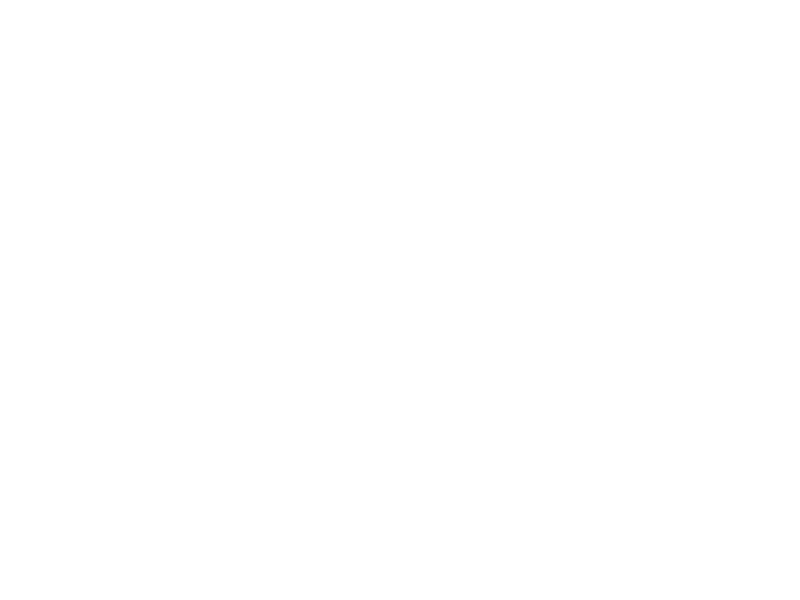

In [21]:
x,y,z,z2,z3 = symbols('x y z z2 z3', real=True)
A2=np.array([[5.0,2],[2,3]])
b2=np.array([-2.0,4])
x2=[x,y]
A=np.array([[3,-1,0,0,0],[-1,12,-1,0,0],[0,-1,24,-1,0],[0,0,-1,48,-1],[0,0,0,-1,96]])
b=np.array([1,2,3,4,5])

iteration_tab = [0 ,0 ,0 ]
x5=[x,y,z,z2,z3]
x5_3x0=[[0,0,0,0,0],[0,1,1,3,2],[1,3,0,4,2]]
x2_3x0=[[0,0],[0,1],[1,2]]


rang_x = np.arange(-10, 10, 0.5)
rang_y = np.arange(-10, 10, 0.5)
fig = plt.figure(figsize = (8,6))
ax = plt.axes(projection='3d')

#fonctions memoire
func1="pow((1-x), 2)+100*pow((y-pow(x,2)),2)" 
func2="x*exp(-pow(x,2)-pow(y,2))" #exp ne fonctionne pas
func3= "1/2*np.dot(np.matmul(A,x5),x5)-np.dot(b,x5)" 
#func4=pow(x,3)+pow(x,2)*y+x*pow(y,2)+pow(y,3)
#menu()